# MNIST avec Keras

Pour plus info, voir la description du cas [MNIST](http://yann.lecun.com/exdb/mnist/) et la documentation de la libraire [Keras](https://keras.io/).

Cette exemple montre comment effectuer une classification par réseau de neurones convolutif d'images de charactères numériques manuscrits [0-9].

In [1]:
import keras
from keras.datasets import mnist
from keras.models import *
from keras.layers import *
from keras.utils import *

Using TensorFlow backend.


## Accès aux données 

La libraire [Keras](https://keras.io/) permet d'accéder à un certain nombre de *datasets* classiques dans la littérature pour tester simplement et rapidement des algorithmes. Ici, on charge 60000 images de 28 pixels par 28 pixels en niveau de gris. Ces images sont réparties en un ensemble utilisé pour l'entrainement et un ensemble pour tester l'entrainement.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Voici quelques exemples d'images considérées

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

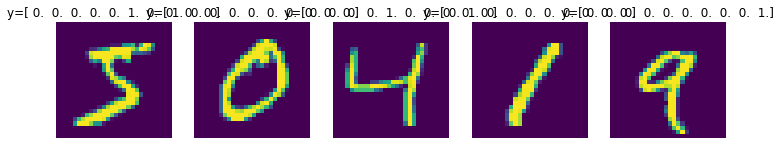

In [27]:
plt.figure(figsize=(12, 12))
for i in range(0,5):
    plt.subplot(151+i)
    plt.axis('off')
    plt.title('y=%s' % y_train[i])
    plt.imshow(x_train[i].reshape((28,28)))
plt.show()

## Préparation des données 

Les images sont redimensionnées en (60000,28,28,1). La dernière dimension est le nombre de canaux (RGB) de l'image, ici un car en niveau de gris.

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Les images sont codés en entier de [0-255]. On transforme les valeurs des pixels l'image en nombre flottant.

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

On normalise les images pour que les valeurs pour chaque pixel soient entre [0-1]. Cette étape est importante pour la performance des algorithmes. 

In [17]:
x_train /= 255
x_test /= 255

Les labels de l'images sont transformés d'une unique valeur [0-9] en un vecteur booléen de 10 valeurs.

In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Algorithme prédictif : Réseau de neurones convolutif 

Le réseau est maintenant défini. On utilise un réseau de 5 couches dont 2 convolutions, un max pooling, et 2 couches de réseaux de neurones fully connected. Pour la régularisation, une couche dropout est ajoutée. Les fonctions d'activation sont de la forme *ReLU* et la fonction *softmax* est utilisée pour les catégories.

> Par exemple, voir cette [présentation](http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf) pour plus d'information. Voir également cette [formation](https://fr.coursera.org/specializations/deep-learning) en ligne.

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

On choisit l'optimiseur et la fonction de coût.

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

## Apprentissage 

Le modèle est entrainé en utilisant les données de tests pour validation.

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=12,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.2690 - acc: 0.9171 - val_loss: 0.0566 - val_acc: 0.9830
Epoch 2/12
60000/60000 [==============================] - 3s 49us/step - loss: 0.0877 - acc: 0.9742 - val_loss: 0.0406 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0638 - acc: 0.9805 - val_loss: 0.0366 - val_acc: 0.9882
Epoch 4/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0541 - acc: 0.9838 - val_loss: 0.0330 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0479 - acc: 0.9856 - val_loss: 0.0282 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0392 - acc: 0.9884 - val_loss: 0.0298 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.0375 - acc: 0.9881 - val_loss: 0.0336 - val_acc

Les courbes de convergence sont affichées.

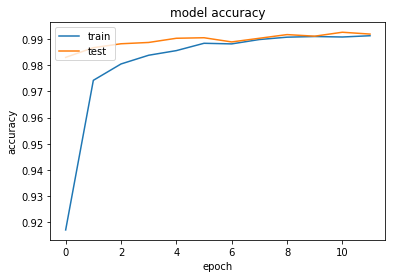

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

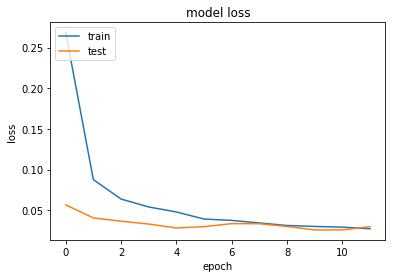

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Le modèle est finalement sauvegardé (architecture + poids calculés).

In [29]:
model.save('mnist.h5')

## Evaluation 

Le score de la base d'entrainement est calculé.

In [28]:
score = model.evaluate(x_test, y_test, verbose=True)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 36us/step
Test loss: 0.0298241458204
Test accuracy: 0.9919


## Prédiction

On peut utiliser le modèle en prédiction

In [33]:
y_pred = model.predict(x_test, verbose=True)

10000/10000 [==============================] - 0s 38us/step


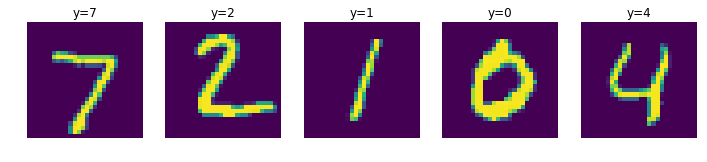

In [34]:
plt.figure(figsize=(12, 12))
for i in range(0,5):
    plt.subplot(151+i)
    plt.axis('off')
    plt.title('y=%s' % np.argmax(y_pred[i]))
    plt.imshow(x_test[i].reshape((28,28)))
plt.show()

Les éléments mal classifiés peuvent être étudiés

In [48]:
y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
misclassified = y_test_1d - y_pred_1d != 0
misclassified_ids = np.where(misclassified)[0] 

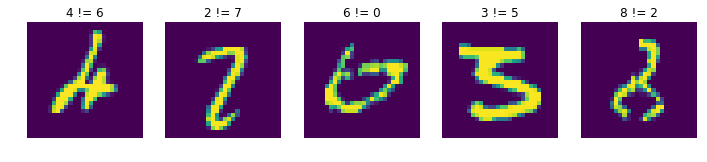

In [50]:
plt.figure(figsize=(12, 12))
for i in range(0,5):
    plt.subplot(151+i)
    plt.axis('off')
    misid = misclassified_ids[i]
    plt.title('%s != %s' % (y_test_1d[misid], y_pred_1d[misid]))
    plt.imshow(x_test[misid].reshape((28,28)))
plt.show()